In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ML tools
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Function to extract elements from 'centroid' list and assign to new columns
def extract_centroid_elements(sheet):
    sheet['L'] = sheet['centroid'].apply(lambda x: eval(x)[0])
    sheet['A'] = sheet['centroid'].apply(lambda x: eval(x)[1])
    sheet['B'] = sheet['centroid'].apply(lambda x: eval(x)[2])
    sheet['C'] = sheet['centroid'].apply(lambda x: eval(x)[3])
    sheet['H'] = sheet['centroid'].apply(lambda x: eval(x)[4])
    return sheet

In [3]:
excel_data = pd.ExcelFile('Data/kmeans_data_4247.xlsx')

In [4]:
# Load each sheet and extract centroid elements
crom_sheet = excel_data.parse('crom')
crom_sheet = extract_centroid_elements(crom_sheet)
crom_sheet['class'] = 'Crom'

cito_sheet = excel_data.parse('cito')
cito_sheet = extract_centroid_elements(cito_sheet)
cito_sheet['class'] = 'Cito'

glob_sheet = excel_data.parse('glob')
glob_sheet = extract_centroid_elements(glob_sheet)
glob_sheet['class'] = 'Glob'

# Combine the sheets into one DataFrame
combined_df = pd.concat([crom_sheet, cito_sheet, glob_sheet], ignore_index=True)

combined_df.head(5)

,image,centroid,sigma,sigma2,min,max,L,A,B,C,H,class
0,000_seg_000,"[60.208187, 28.140545, -34.262962, 28.63813, -...","[5.004295, 4.2057266, 5.612323, 3.9732802, 5.5...","[10.00859, 8.411453, 11.224646, 7.9465604, 11....","[49.495476, 16.729332, -48.236485, 18.318043, ...","[71.74944, 38.006695, -22.794289, 38.006702, -...",60.208187,28.140545,-34.262962,28.638130,-34.661087,Crom
1,000_seg_001,"[71.86179, 23.403507, -22.105753, 22.82225, -2...","[5.2147818, 4.264248, 5.302707, 4.3610606, 5.5...","[10.4295635, 8.528496, 10.605414, 8.722121, 11...","[57.53477, 15.112419, -39.29723, 14.252354, -3...","[82.50399, 34.550774, -13.415171, 34.55077, -1...",71.861790,23.403507,-22.105753,22.822250,-20.897806,Crom
2,000_seg_002,"[62.55246, 33.00717, -40.90761, 32.61665, -39....","[5.7512674, 4.97069, 8.155145, 5.339188, 8.808...","[11.502535, 9.94138, 16.31029, 10.678376, 17.6...","[52.918896, 22.912691, -55.12853, 20.77516, -5...","[74.518875, 41.787266, -26.013348, 41.787266, ...",62.552460,33.007170,-40.907610,32.616650,-39.606594,Crom
3,000_seg_003,"[64.61802, 32.05196, -39.390232, 32.375896, -3...","[6.8690333, 6.1347885, 8.820966, 6.0755906, 8....","[13.738067, 12.269577, 17.641932, 12.151181, 1...","[47.451145, 21.071775, -68.12405, 21.071777, -...","[78.43772, 48.551487, -25.866201, 48.551487, -...",64.618020,32.051960,-39.390232,32.375896,-39.521260,Crom
4,000_seg_004,"[69.62325, 30.944225, -32.409725, 30.528486, -...","[4.535982, 5.1429024, 5.876919, 5.1697593, 6.3...","[9.071964, 10.285805, 11.753838, 10.339519, 12...","[61.772903, 20.698462, -44.183777, 20.698465, ...","[78.83857, 42.16238, -21.20843, 42.16238, -18....",69.623250,30.944225,-32.409725,30.528486,-31.293455,Crom


<Axes: xlabel='L', ylabel='A'>

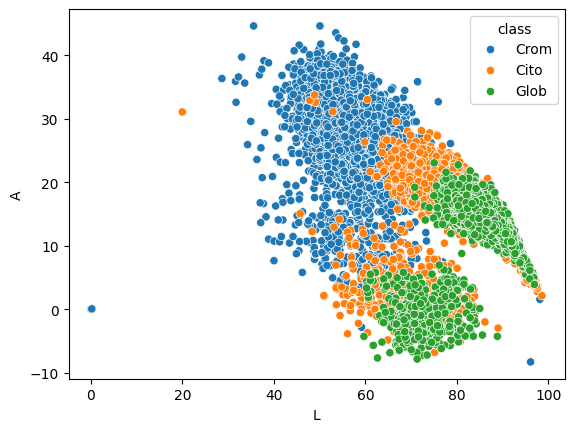

In [5]:
sns.scatterplot(x='L',y='A',data=combined_df,hue='class')

In [6]:
# Usamos para el entrenamiento
features = ['L', 'A','B','C','H']
X = combined_df[features]
y = combined_df['class']

In [7]:
# Veamos las correlaciones
X.corr()

,L,A,B,C,H
L,1.000000,-0.647018,0.916126,-0.685513,0.856521
A,-0.647018,1.000000,-0.746727,0.829759,-0.715703
B,0.916126,-0.746727,1.000000,-0.776197,0.944283
C,-0.685513,0.829759,-0.776197,1.000000,-0.729749
H,0.856521,-0.715703,0.944283,-0.729749,1.000000


In [8]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Split the standardized data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [10]:
# Create and train the Support Vector Machine model on standardized data
svm_model_scaled = svm.SVC(kernel='rbf') # Kernel polinomial
#svm_model_scaled = svm.SVC(kernel='linear')
svm_model_scaled.fit(X_train_scaled, y_train)

SVC()

In [11]:
# Make predictions
y_pred_scaled = svm_model_scaled.predict(X_test_scaled)
#y_pred_scaled

In [12]:
# Generate a classification report
report_scaled = classification_report(y_test, y_pred_scaled, output_dict=True)
pd.DataFrame(report_scaled).transpose()

,precision,recall,f1-score,support
Cito,0.850216,0.751914,0.798050,1306.000000
Crom,0.964567,0.948877,0.956658,1291.000000
Glob,0.800429,0.912724,0.852896,1226.000000
accuracy,0.869997,0.869997,0.869997,0.869997
macro avg,0.871738,0.871172,0.869201,3823.000000
weighted avg,0.872865,0.869997,0.869199,3823.000000


In [13]:
# Generate the confusion matrix
conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled, labels=['Crom', 'Cito', 'Glob'])
conf_matrix_scaled

array([[1225,   66,    0],
       [  45,  982,  279],
       [   0,  107, 1119]])

Text(0.5, 1.0, 'Confusion Matrix (Standardized)')

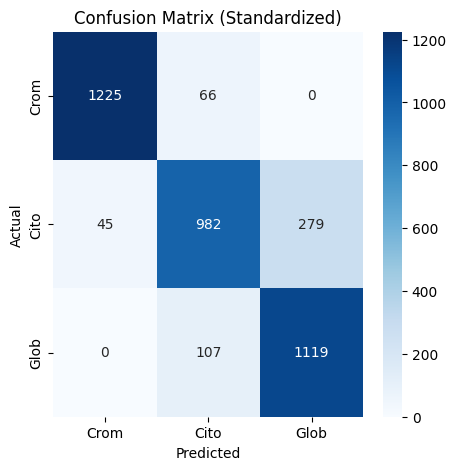

In [14]:
# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_scaled, annot=True, fmt='d', cmap='Blues', xticklabels=['Crom', 'Cito', 'Glob'], yticklabels=['Crom', 'Cito', 'Glob'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Standardized)')

In [15]:
def Predictor(data):
    
    data = np.array([data])
    # Estandarizamos
    data_scaled = scaler.transform(data)
    #print(data_scaled)
    
    prediction = svm_model_scaled.predict(data_scaled)
    
    return prediction[0]

In [16]:
Predictor(X.iloc[9])

/home/alejandro/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Crom'